In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
#import data

ad_data = pd.read_csv("D:\Artificial Intelligence\Samatrix Projects\Advertising\DataSet\Advertising.csv",usecols=[1,2,3,4])

In [11]:
#understanding of data

print(ad_data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [12]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
ad_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [14]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
ad_data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [17]:
ad_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Analysis

In [18]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
#the min value of Radio is zero. so check how many zero values existing in the dataset.

In [22]:
#For all other columns, the data cleaning is not required. However the data scaling is required.



Analysis of Zero Values in Predictors

In [24]:
(ad_data == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [25]:
#only Radio col has zero value  which is possible. Hence we conclude the data cleaning steps are not required.

Relationship - Predictor and Response

C:\Users\bhune\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

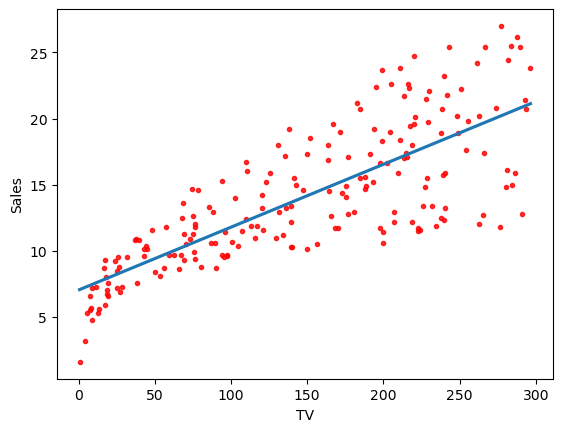

In [34]:
#Rel betn sales and TV

sns.regplot(ad_data.TV,ad_data.Sales ,order=1,ci=1,scatter_kws={'color':'r','s':9})

<AxesSubplot:xlabel='Sales', ylabel='Radio'>

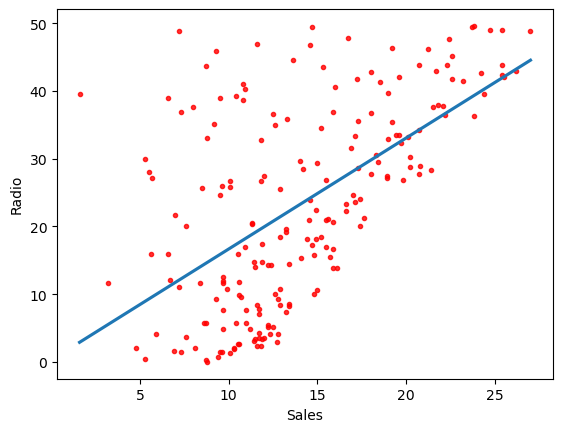

In [36]:
#Relationship between Sales and Radio

sns.regplot(ad_data.Sales,ad_data.Radio,order=1,ci=None,scatter_kws={'color':'r','s':9})

C:\Users\bhune\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

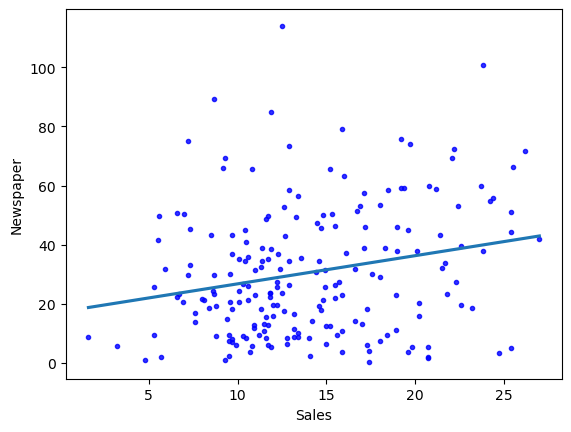

In [37]:
#Relationship between Sales and Newspaper

sns.regplot(ad_data.Sales,ad_data.Newspaper,order=1,ci=None,scatter_kws={'color':'b','s':9})

# Data Normalization

In [38]:
from sklearn.preprocessing import scale

In [41]:
X=scale(ad_data.TV,with_mean=True,with_std=False).reshape(-1,1)

In [43]:
y=ad_data.Sales

In [44]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [45]:
X.mean()

1.0089706847793422e-14

In [46]:
X.std()

85.63933175679269

Linear regression(Scaled Data)

In [93]:
import sklearn.linear_model as skl

In [94]:
reg = skl.LinearRegression()

In [95]:
reg.fit(X,y)

LinearRegression()

In [96]:
reg.intercept_

7.032593549127693

In [97]:
reg.coef_

array([0.04753664])

In [98]:
#min rss

min_rss = np.sum((reg.intercept_+reg.coef_*X - y.values.reshape(-1,1))**2)

Linear Regression (unscaled data)


In [99]:
reg = skl.LinearRegression()

In [100]:
X=ad_data.TV.values.reshape(-1,1)

In [101]:
y = ad_data.Sales

In [102]:
reg.fit(X,y)

LinearRegression()

In [103]:
reg.intercept_

7.032593549127693

In [104]:
reg.coef_

array([0.04753664])

In [105]:
#Rss

min_rss = np.sum((reg.intercept_+reg.coef_*X-y.values.reshape(-1,1))**2)

In [106]:
min_rss

2102.5305831313512

In [107]:
#MSE

mse = min_rss/len(y)

In [108]:
mse


10.512652915656757

R-Sq using Sklearn

In [109]:
from sklearn.metrics import mean_squared_error ,r2_score

In [110]:
Sales_pred = reg.predict(X)

In [111]:

r2_score(y,Sales_pre)

-1.1919813484022592

#MSE using sklearn

In [113]:
mean_squared_error(y,Sales_pred)

10.512652915656757

# Regression using Statsmodel

In [117]:
import statsmodels.formula.api as smf

In [118]:
est = smf.ols('Sales ~ TV',ad_data).fit()

In [119]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        23:18:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Regression RSS AND MSE

In [121]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [122]:
#RSS

((ad_data.Sales - (est.params[0] + est.params[1] * ad_data.TV))**2).sum()

2102.5305831313512

In [124]:
#MSE

((ad_data.Sales - (est.params[0] + est.params[1]*ad_data.TV))** 2).sum()/len(ad_data.Sales)

10.512652915656757

# Single Linear Regression

In [126]:
#Linear Regression Sales and Radio


est = smf.ols('Sales ~ Radio', ad_data).fit()

In [127]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [128]:
#Check the p-value of Intercept and Radio.

#It shows that there is a relationship between Sales and Radio

In [130]:
#Linear Regression Sales and Newspaper

est = smf.ols('Sales ~Newspaper',ad_data).fit()

In [132]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [133]:
#Check the p value of Intercept and Newspaper.

#It shows that there is a relationship between Sales and Newspaper

# Multiple Linear Regression

In [137]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', ad_data).fit()


In [138]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        23:25:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Matrix

In [140]:
ad_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000
